In [8]:
from modsim import *
%matplotlib inline
import matplotlib.pyplot as plt



http://www.pveducation.org/pvcdrom/2-properties-sunlight/solar-radiation-space

In [9]:
degrees= UNITS.degrees

In [10]:
mkm= 1/1000

sechour= (1/60)**2 

mass_sun= 1.989e30 
G= 6.673e-11 * mkm**3 
mass_toast= .5
S_B_const= 5.67e-8 
temp_S= 5772 
area_t= .01 *mkm**2
r_s= 3.19e3
Pow_s= 3.9e26 
Q_b= 8000
SA_sun= 4*pi*r_s**2




num_G = G* mass_sun   

num_G

dist_init= 5e8

VXinit= sqrt(2*num_G/dist_init)

SA_sun


#I think these are all the equations and constants we need. I found a specific heat for bread that was in kg and C, 
#which I think I converted into Kelvin but it's a bit sketchy. I'm also not sure about the area of the sunward facing 
#toast side, but we can look back at that. 

127876644.00878038

In [13]:

condition= Condition(x0= 0, y0= -1e9, velocity= 18, angle = 45*degrees, duration= 1e8, T0= 0 )

In [14]:
#I'm not sure I'm doing this right, I'm mostly copying this from chapter 10 with the intro to vectors and the baseball. 

def make_system(condition):
    unpack(condition)
    
    theta = np.deg2rad(angle)
    
    vx, vy = pol2cart(theta, velocity)

    
    ts= linspace(0, duration, 101)
    time_step= duration/ 101
    
    rad_on_toast=  Pow_s * area_t *(r_s**2/y0**2) 
    temp_toast= rad_on_toast / Q_b * mass_toast 
    
    init= State(x=x0, y=y0, vx= vx, vy= vy, temp= temp_toast)
    area_toast = area_t 
    
    return System(init= init, mass= mass_toast, area_t= area_t, ts= ts)

system= make_system(condition) 



In [15]:
def slope_func(state, t, system):
    x, y, vx, vy, temp = state
    
    unpack(system)
    dist= sqrt(x**2+y**2)
    P= Vector(-x, -y) 
    V= Vector(vx, vy) 
    tan_vect= Vector((-y/dist), (x/ dist))
    tan_v= tan_vect/tan_vect.mag
    #print(tan_v)
    
    xdir= -x/ dist
    ydir= -y/dist
    w= V.proj(tan_v)
    

    F_grav= G* mass_sun *mass_toast/ (dist)**2
    
    a_grav= Vector(xdir, ydir) *((F_grav)/mass_toast) 
    a_cent= Vector(-xdir, -ydir) *(w.mag**2)/dist
    
    #print(a_cent)
    ax= a_grav.x + a_cent.x
    ay= a_grav.y + a_cent.y
    
    
    rad_on_toast=  Pow_s * area_t *(r_s**2/dist**2) 
    temp_toast= rad_on_toast / Q_b * mass_toast -temp
    
    
    
    return vx, vy, ax, ay, temp_toast
    
    
                     
    
    
slope_func(system.init,1,system)
    

(<Quantity(12.727922061357857, 'dimensionless')>,
 <Quantity(12.727922061357857, 'dimensionless')>,
 <Quantity(0.0, 'dimensionless')>,
 <Quantity(-2.927403000000003e-08, 'dimensionless')>,
 0.0)

In [16]:

run_odeint(system, slope_func)

In [17]:
system.results

,x,y,vx,vy,temp
0.0,0.000000e+00,-1.000000e+09,12.727922,12.727922,2480.424375
1000000.0,1.272799e+07,-9.872872e+08,12.728122,12.697221,2544.291115
2000000.0,2.545640e+07,-9.746065e+08,12.728781,12.663574,2609.583183
3000000.0,3.818573e+07,-9.619611e+08,12.729992,12.626840,2676.253103
4000000.0,5.091660e+07,-9.493539e+08,12.731860,12.586880,2744.240809
5000000.0,6.364971e+07,-9.367884e+08,12.734496,12.543558,2813.472327
6000000.0,7.638589e+07,-9.242680e+08,12.738024,12.496739,2883.858477
7000000.0,8.912610e+07,-9.117962e+08,12.742576,12.446296,2955.293599
8000000.0,1.018714e+08,-8.993766e+08,12.748297,12.392107,3027.654241
9000000.0,1.146231e+08,-8.870132e+08,12.755338,12.334060,3100.798071


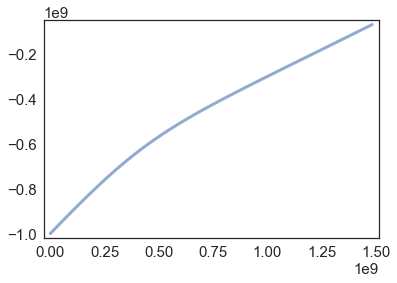

In [18]:
plot(system.results.x, system.results.y, )
#plt.axis([-5e8, 5e8, -5e8, 1.2e10])

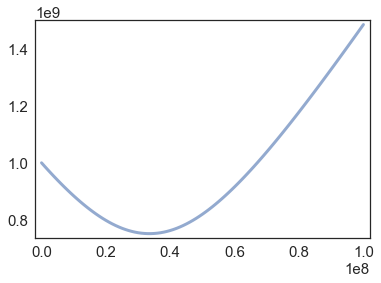

In [19]:
magdist= sqrt(system.results.y**2 + system.results.x**2)

plot(system.ts, magdist)

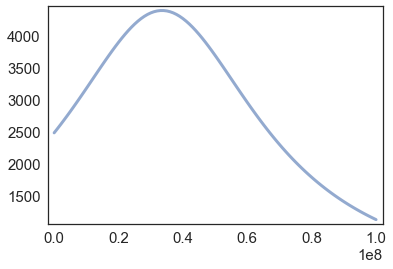

In [20]:
plot(system.ts, system.results.temp)

In [21]:
min_dist= magdist.argmin()


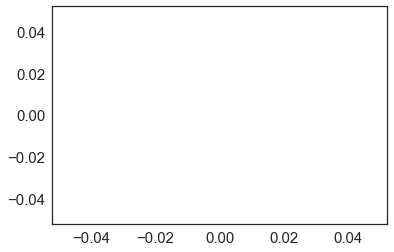

In [22]:
plot()

In [23]:
a = 0
for n in system.results.temp:
    a = a + n
avg_temp = a / len(system.results.temp)  

In [24]:
avg_temp

2958.8631411404999